In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Decision tree model

In [5]:
#Predict Survival with Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].copy()

In [8]:
new_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [9]:
sex_en = {"male":0,"female":1}
new_data["Sex"] = new_data["Sex"].map(sex_en)

In [10]:
emb_en = {"S":0,"C":1,"Q":2}
new_data["Embarked"] = new_data["Embarked"].map(emb_en)

In [11]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,1


In [12]:
x=new_data.iloc[:,:-1]
y=new_data["Survived"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
dt.score(x_test,y_test)*100 , dt.score(x_train,y_train)*100

(79.88826815642457, 97.75280898876404)

In [17]:
dt.predict([[3,1,26,0,0,7.9,0]])

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
#3	0	22.0	1	0	7.2500	0.0	    0   0 
#3	1	26.0	0	0	7.9250	0.0  	1   1


# Feature selection 

In [19]:
#Show which features are most important to the Decision Tree.

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [30]:
fs = SequentialFeatureSelector(dt,k_features = 4,forward = True)
fs.fit(x_imputed, y.values) 


SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(4, 4),
                          scoring='accuracy')

In [31]:
fs.feature_names

In [32]:
fs.k_feature_names_

('0', '1', '5', '6')

In [33]:
fs.k_score_

np.float64(0.8148829326470404)

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

#  Confusion Matrix & Classification Report

In [25]:
#Evaluate performance beyond accuracy

In [26]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [27]:
cf = confusion_matrix(y_test,dt.predict(x_test))
cf

array([[89, 16],
       [20, 54]])

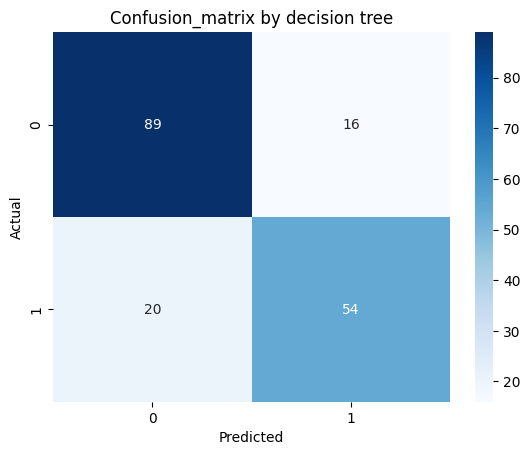

In [28]:
sns.heatmap(cf,annot = True ,cmap = 'Blues',fmt = "d")
plt.title("Confusion_matrix by decision tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()